In [1]:
library("deMULTIplex")
library("ggplot2")

Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘tibble’”


In [2]:
## deMULTIplexing ##
setwd("/project/ABKlab/Natalia/sc-RNA-seq/single_TLS_project")

# Table 48h

In [3]:
bartable_48h <- readRDS("./files/bartable_48h.rds")

In [4]:
head(bartable_48h)
dim(bartable_48h)

,Bar1,Bar2,Bar3,Bar4,Bar5,Bar6,Bar7,Bar8,Bar9,Bar10,⋯,Bar65,Bar66,Bar67,Bar68,Bar69,Bar70,Bar71,Bar72,nUMI,nUMI_total
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AAACCCAAGTTCTACG,7,1,6,4,6,9,2,6,16,6,⋯,6,2,5,11,2,3,10,2,4221,5161
AAACCCACACAAGGTG,9,0,5,1,2,9,0,6,9,0,⋯,0,0,6,5371,1,1,4,5,5563,7066
AAACCCACAGCGGTCT,4,4,10,0,5,6,0,4,8,3,⋯,6,4,7,15,3,2,5,3,254,316
AAACCCACAGCTGGTC,9,4,7,0,2,14,2,6,13,3,⋯,5,5,9,10,2,1,4,2,264,341
AAACCCAGTACCGGCT,3,4,7,4,3,12,0,4,4,2,⋯,4,2,5,8,1,1,2,4,218,282
AAACCCAGTCGTTGCG,6,1,6,2,1,6,2,5,5,1,⋯,5,2,2,8,2,2,2,1,1393,1649


[1] 9293   74

In [5]:
x <- bartable_48h
initial_cell_number <- nrow(bartable_48h)

## demultiplexing: classification

In [6]:
## Visualize barcode space
bar.tsne <- barTSNE(x[,1:72]) # number of barcodes and not columns !!
## Note: Exclude columns 97:98 (assuming 96 barcodes were used) which provide total barcode UMI counts for each cell. 

pdf("./outputs/MULTIseq/48h_bc.check.pdf")
for (i in 3:ncol(bar.tsne)) {
  g <- ggplot(bar.tsne, aes(x = TSNE1, y = TSNE2, color = bar.tsne[,i])) +
    geom_point() +
    scale_color_gradient(low = "black", high = "red") +
    ggtitle(colnames(bar.tsne)[i]) +
    theme(legend.position = "none") 
  print(g)
}
dev.off()


Loading required package: Rtsne



Performing PCA
Read the 9293 x 72 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 9.53 seconds (sparsity = 0.015256)!
Learning embedding...
Iteration 50: error is 94.786843 (50 iterations in 1.76 seconds)
Iteration 100: error is 93.675623 (50 iterations in 2.03 seconds)
Iteration 150: error is 92.157115 (50 iterations in 1.92 seconds)
Iteration 200: error is 92.114451 (50 iterations in 1.92 seconds)
Iteration 250: error is 92.103890 (50 iterations in 1.91 seconds)
Iteration 300: error is 3.340783 (50 iterations in 1.47 seconds)
Iteration 350: error is 2.955597 (50 iterations in 1.50 seconds)
Iteration 400: error is 2.771027 (50 iterations in 1.46 seconds)
Iteration 450: error is 2.662492 (50 iterations in 1.43 seconds)
Iteration 500: error is 2.588683 (50 iterations in 1.42 seconds)
Iteration 550: error is 2.535698 (50 iterations in 1.42 seconds)
Iteration 60

png 
  2

[1] 0.01
[1] "No threshold found for Bar50..."
[1] 0.03
[1] "No threshold found for Bar50..."
[1] 0.05
[1] "No threshold found for Bar50..."
[1] 0.07
[1] "No threshold found for Bar50..."
[1] 0.09
[1] "No threshold found for Bar50..."
[1] 0.11
[1] "No threshold found for Bar50..."
[1] 0.13
[1] "No threshold found for Bar50..."
[1] 0.15
[1] "No threshold found for Bar50..."
[1] 0.17
[1] "No threshold found for Bar50..."
[1] 0.19
[1] "No threshold found for Bar50..."
[1] 0.21
[1] "No threshold found for Bar50..."
[1] 0.23
[1] "No threshold found for Bar50..."
[1] 0.25
[1] "No threshold found for Bar50..."
[1] 0.27
[1] "No threshold found for Bar50..."
[1] 0.29
[1] "No threshold found for Bar50..."
[1] 0.31
[1] "No threshold found for Bar50..."
[1] 0.33
[1] "No threshold found for Bar50..."
[1] 0.35
[1] "No threshold found for Bar50..."
[1] 0.37
[1] "No threshold found for Bar50..."
[1] 0.39
[1] "No threshold found for Bar50..."
[1] 0.41
[1] "No threshold found for Bar50..."
[1] 0.43
[1] 

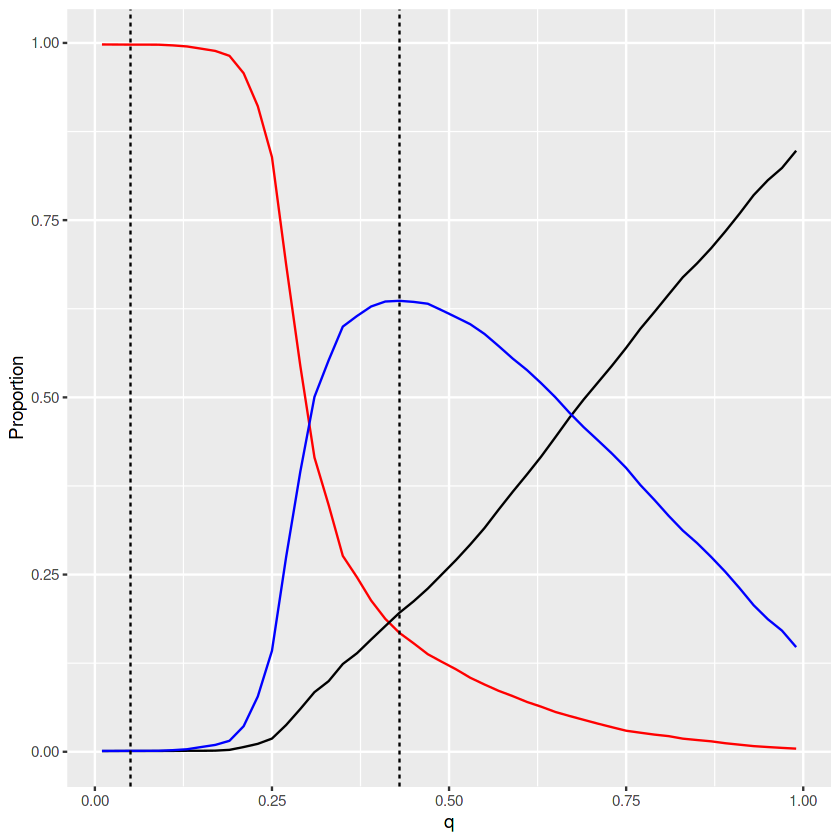

In [8]:
# Sample classification
## Round 1 -----------------------------------------------------------------------------------------------------
## Perform Quantile Sweep
bar.table.full <- x[,1:72]
good.bars <- paste("Bar",1:72,sep="")  # NOTE: In this hypothetical example, barcodes 91-96 were not detected
bar.table <- bar.table.full[, good.bars]  # Remove missing bars and summary columns
bar.table_sweep.list <- list()
n <- 0
for (q in seq(0.01, 0.99, by=0.02)) {
  print(q)
  n <- n + 1
  bar.table_sweep.list[[n]] <- classifyCells(bar.table, q=q)
  names(bar.table_sweep.list)[n] <- paste("q=",q,sep="")
}

## Identify ideal inter-maxima quantile to set barcode-specific thresholds
threshold.results1 <- findThresh(call.list=bar.table_sweep.list)
ggplot(data=threshold.results1$res, aes(x=q, y=Proportion, color=Subset)) + geom_line() + theme(legend.position = "none") +
  geom_vline(xintercept=threshold.results1$extrema, lty=2) + scale_color_manual(values=c("red","black","blue"))

## Finalize round 1 classifications, remove negative cells
round1.calls <- classifyCells(bar.table, q=findQ(threshold.results1$res, threshold.results1$extrema))
neg.cells <- names(round1.calls)[which(round1.calls == "Negative")]
bar.table <- bar.table[-which(rownames(bar.table) %in% neg.cells), ]


In [9]:
table(round1.calls)
length(round1.calls)

round1.calls
    Bar1    Bar10    Bar11    Bar12    Bar13    Bar14    Bar15    Bar16 
      61       57      118       76       86      113      103      101 
   Bar17    Bar18    Bar19     Bar2    Bar20    Bar21    Bar22    Bar23 
      37      112       28      110      121       31      108      139 
   Bar24    Bar25    Bar26    Bar27    Bar28    Bar29     Bar3    Bar30 
     102       72       20       42       43       48      100       87 
   Bar31    Bar32    Bar33    Bar34    Bar35    Bar36    Bar37    Bar38 
      90      116      121      103       25       88       31       38 
   Bar39     Bar4    Bar40    Bar41    Bar42    Bar43    Bar44    Bar45 
      30      131       85      155      121      116       59       99 
   Bar46    Bar47    Bar48    Bar49     Bar5    Bar51    Bar52    Bar53 
      26       43       20       34       86      140      121       33 
   Bar54    Bar55    Bar56    Bar57    Bar58    Bar59     Bar6    Bar60 
      60       77       36       89   

[1] 9293

In [10]:
## Round 2 -----------------------------------------------------------------------------------------------------
bar.table_sweep.list <- list()
n <- 0
for (q in seq(0.01, 0.99, by=0.02)) {
  print(q)
  n <- n + 1
  bar.table_sweep.list[[n]] <- classifyCells(bar.table, q=q)
  names(bar.table_sweep.list)[n] <- paste("q=",q,sep="")
}

threshold.results2 <- findThresh(call.list=bar.table_sweep.list)
round2.calls <- classifyCells(bar.table, q=findQ(threshold.results2$res, threshold.results2$extrema))
neg.cells <- c(neg.cells, names(round2.calls)[which(round2.calls == "Negative")])

[1] 0.01
[1] "No threshold found for Bar50..."
[1] 0.03
[1] "No threshold found for Bar50..."
[1] 0.05
[1] "No threshold found for Bar50..."
[1] 0.07
[1] "No threshold found for Bar50..."
[1] 0.09
[1] "No threshold found for Bar50..."
[1] 0.11
[1] "No threshold found for Bar50..."
[1] 0.13
[1] "No threshold found for Bar50..."
[1] 0.15
[1] "No threshold found for Bar50..."
[1] 0.17
[1] "No threshold found for Bar50..."
[1] 0.19
[1] "No threshold found for Bar50..."
[1] 0.21
[1] "No threshold found for Bar50..."
[1] 0.23
[1] "No threshold found for Bar50..."
[1] 0.25
[1] "No threshold found for Bar50..."
[1] 0.27
[1] "No threshold found for Bar50..."
[1] 0.29
[1] "No threshold found for Bar50..."
[1] 0.31
[1] "No threshold found for Bar50..."
[1] 0.33
[1] "No threshold found for Bar50..."
[1] 0.35
[1] "No threshold found for Bar50..."
[1] 0.37
[1] "No threshold found for Bar50..."
[1] 0.39
[1] "No threshold found for Bar50..."
[1] 0.41
[1] "No threshold found for Bar50..."
[1] 0.43
[1] 

In [11]:
length(neg.cells)

table(round2.calls)
length(round2.calls)

[1] 2208

round2.calls
    Bar1    Bar10    Bar11    Bar12    Bar13    Bar14    Bar15    Bar16 
      53       61      121       75       78      104      102       93 
   Bar17    Bar18    Bar19     Bar2    Bar20    Bar21    Bar22    Bar23 
      40      115       28      113      124       35       87      132 
   Bar24    Bar25    Bar26    Bar27    Bar28    Bar29     Bar3    Bar30 
      96       64       26       42       49       50       98       84 
   Bar31    Bar32    Bar33    Bar34    Bar35    Bar36    Bar37    Bar38 
      83      113      123       90       31       92       33       46 
   Bar39     Bar4    Bar40    Bar41    Bar42    Bar43    Bar44    Bar45 
      30      130       38      161      119      112       65       98 
   Bar46    Bar47    Bar48    Bar49     Bar5    Bar51    Bar52    Bar53 
      34       45       23       25       75      135      114       36 
   Bar54    Bar55    Bar56    Bar57    Bar58    Bar59     Bar6    Bar60 
      66       72       39       89   

[1] 7470

In [12]:
## Round 3 -----------------------------------------------------------------------------------------------------
bar.table_sweep.list <- list()
n <- 0
for (q in seq(0.01, 0.99, by=0.02)) {
  print(q)
  n <- n + 1
  bar.table_sweep.list[[n]] <- classifyCells(bar.table, q=q)
  names(bar.table_sweep.list)[n] <- paste("q=",q,sep="")
}

threshold.results3 <- findThresh(call.list=bar.table_sweep.list)
round3.calls <- classifyCells(bar.table, q=findQ(threshold.results3$res, threshold.results3$extrema))
neg.cells <- c(neg.cells, names(round3.calls)[which(round3.calls == "Negative")])

[1] 0.01
[1] "No threshold found for Bar50..."
[1] 0.03
[1] "No threshold found for Bar50..."
[1] 0.05
[1] "No threshold found for Bar50..."
[1] 0.07
[1] "No threshold found for Bar50..."
[1] 0.09
[1] "No threshold found for Bar50..."
[1] 0.11
[1] "No threshold found for Bar50..."
[1] 0.13
[1] "No threshold found for Bar50..."
[1] 0.15
[1] "No threshold found for Bar50..."
[1] 0.17
[1] "No threshold found for Bar50..."
[1] 0.19
[1] "No threshold found for Bar50..."
[1] 0.21
[1] "No threshold found for Bar50..."
[1] 0.23
[1] "No threshold found for Bar50..."
[1] 0.25
[1] "No threshold found for Bar50..."
[1] 0.27
[1] "No threshold found for Bar50..."
[1] 0.29
[1] "No threshold found for Bar50..."
[1] 0.31
[1] "No threshold found for Bar50..."
[1] 0.33
[1] "No threshold found for Bar50..."
[1] 0.35
[1] "No threshold found for Bar50..."
[1] 0.37
[1] "No threshold found for Bar50..."
[1] 0.39
[1] "No threshold found for Bar50..."
[1] 0.41
[1] "No threshold found for Bar50..."
[1] 0.43
[1] 

In [13]:
length(neg.cells)

table(round3.calls)
length(round3.calls)

[1] 2593

round3.calls
    Bar1    Bar10    Bar11    Bar12    Bar13    Bar14    Bar15    Bar16 
      53       61      121       75       78      104      102       93 
   Bar17    Bar18    Bar19     Bar2    Bar20    Bar21    Bar22    Bar23 
      40      115       28      113      124       35       87      132 
   Bar24    Bar25    Bar26    Bar27    Bar28    Bar29     Bar3    Bar30 
      96       64       26       42       49       50       98       84 
   Bar31    Bar32    Bar33    Bar34    Bar35    Bar36    Bar37    Bar38 
      83      113      123       90       31       92       33       46 
   Bar39     Bar4    Bar40    Bar41    Bar42    Bar43    Bar44    Bar45 
      30      130       38      161      119      112       65       98 
   Bar46    Bar47    Bar48    Bar49     Bar5    Bar51    Bar52    Bar53 
      34       45       23       25       75      135      114       36 
   Bar54    Bar55    Bar56    Bar57    Bar58    Bar59     Bar6    Bar60 
      66       72       39       89   

[1] 7470

In [14]:
## Repeat until all no negative cells remain (usually 3 rounds)...
final.calls <- c(round3.calls, rep("Negative",length(neg.cells)))
names(final.calls) <- c(names(round3.calls),neg.cells)

In [15]:
head(bar.table)
dim(bar.table)

,Bar1,Bar2,Bar3,Bar4,Bar5,Bar6,Bar7,Bar8,Bar9,Bar10,⋯,Bar63,Bar64,Bar65,Bar66,Bar67,Bar68,Bar69,Bar70,Bar71,Bar72
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AAACCCAAGTTCTACG,7,1,6,4,6,9,2,6,16,6,⋯,7,1,6,2,5,11,2,3,10,2
AAACCCACACAAGGTG,9,0,5,1,2,9,0,6,9,0,⋯,5,1,0,0,6,5371,1,1,4,5
AAACCCACAGCTGGTC,9,4,7,0,2,14,2,6,13,3,⋯,2,0,5,5,9,10,2,1,4,2
AAACCCAGTCGTTGCG,6,1,6,2,1,6,2,5,5,1,⋯,1,3,5,2,2,8,2,2,2,1
AAACCCATCCTACACC,5,2,12,1,4,7,3,6,12,4,⋯,6,28,5,6,3,19,5,0,2,1
AAACGAAAGCCGAATG,8,4,9,3,2,11,5,2,9,2,⋯,5,7,6,4,6,14,16,0,10,5


[1] 7470   72

In [16]:
## Visualize barcode space
bar.tsne <- barTSNE(bar.table[,1:72]) 
## Note: Exclude columns 97:98 (assuming 96 barcodes were used) which provide total barcode UMI counts for each cell. 

pdf("./outputs/MULTIseq/48h_bc.check_round3.pdf")
for (i in 3:ncol(bar.tsne)) {
  g <- ggplot(bar.tsne, aes(x = TSNE1, y = TSNE2, color = bar.tsne[,i])) +
    geom_point() +
    scale_color_gradient(low = "black", high = "red") +
    ggtitle(colnames(bar.tsne)[i]) +
    theme(legend.position = "none") 
  print(g)
}
dev.off()

Performing PCA
Read the 7470 x 72 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 6.20 seconds (sparsity = 0.017252)!
Learning embedding...
Iteration 50: error is 93.064145 (50 iterations in 1.43 seconds)
Iteration 100: error is 89.355386 (50 iterations in 1.75 seconds)
Iteration 150: error is 87.483301 (50 iterations in 1.43 seconds)
Iteration 200: error is 87.345744 (50 iterations in 1.42 seconds)
Iteration 250: error is 87.314591 (50 iterations in 1.43 seconds)
Iteration 300: error is 2.656195 (50 iterations in 1.23 seconds)
Iteration 350: error is 2.216981 (50 iterations in 1.20 seconds)
Iteration 400: error is 2.017149 (50 iterations in 1.17 seconds)
Iteration 450: error is 1.898425 (50 iterations in 1.16 seconds)
Iteration 500: error is 1.820734 (50 iterations in 1.15 seconds)
Iteration 550: error is 1.765114 (50 iterations in 1.15 seconds)
Iteration 60

png 
  2

## Generation of barcode table

In [17]:
head(bar.table)
dim(bar.table)
bar.table$cell <- rownames(bar.table)

,Bar1,Bar2,Bar3,Bar4,Bar5,Bar6,Bar7,Bar8,Bar9,Bar10,⋯,Bar63,Bar64,Bar65,Bar66,Bar67,Bar68,Bar69,Bar70,Bar71,Bar72
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AAACCCAAGTTCTACG,7,1,6,4,6,9,2,6,16,6,⋯,7,1,6,2,5,11,2,3,10,2
AAACCCACACAAGGTG,9,0,5,1,2,9,0,6,9,0,⋯,5,1,0,0,6,5371,1,1,4,5
AAACCCACAGCTGGTC,9,4,7,0,2,14,2,6,13,3,⋯,2,0,5,5,9,10,2,1,4,2
AAACCCAGTCGTTGCG,6,1,6,2,1,6,2,5,5,1,⋯,1,3,5,2,2,8,2,2,2,1
AAACCCATCCTACACC,5,2,12,1,4,7,3,6,12,4,⋯,6,28,5,6,3,19,5,0,2,1
AAACGAAAGCCGAATG,8,4,9,3,2,11,5,2,9,2,⋯,5,7,6,4,6,14,16,0,10,5


[1] 7470   72

In [18]:
table(final.calls)
length(final.calls)

final.calls
    Bar1    Bar10    Bar11    Bar12    Bar13    Bar14    Bar15    Bar16 
      53       61      121       75       78      104      102       93 
   Bar17    Bar18    Bar19     Bar2    Bar20    Bar21    Bar22    Bar23 
      40      115       28      113      124       35       87      132 
   Bar24    Bar25    Bar26    Bar27    Bar28    Bar29     Bar3    Bar30 
      96       64       26       42       49       50       98       84 
   Bar31    Bar32    Bar33    Bar34    Bar35    Bar36    Bar37    Bar38 
      83      113      123       90       31       92       33       46 
   Bar39     Bar4    Bar40    Bar41    Bar42    Bar43    Bar44    Bar45 
      30      130       38      161      119      112       65       98 
   Bar46    Bar47    Bar48    Bar49     Bar5    Bar51    Bar52    Bar53 
      34       45       23       25       75      135      114       36 
   Bar54    Bar55    Bar56    Bar57    Bar58    Bar59     Bar6    Bar60 
      66       72       39       89    

[1] 10063

In [19]:
prueba <- as.matrix(final.calls)
prueba <- as.data.frame(prueba)
prueba$cell <- rownames(prueba)
table(prueba$V1)

prueba.merged <- merge (bar.table, prueba, by = "cell")
prueba.merged$V1 <- as.character(prueba.merged$V1)

barcode_assignment_48h <- prueba.merged
head(barcode_assignment_48h)
dim(barcode_assignment_48h)
table(barcode_assignment_48h$V1)


    Bar1    Bar10    Bar11    Bar12    Bar13    Bar14    Bar15    Bar16 
      53       61      121       75       78      104      102       93 
   Bar17    Bar18    Bar19     Bar2    Bar20    Bar21    Bar22    Bar23 
      40      115       28      113      124       35       87      132 
   Bar24    Bar25    Bar26    Bar27    Bar28    Bar29     Bar3    Bar30 
      96       64       26       42       49       50       98       84 
   Bar31    Bar32    Bar33    Bar34    Bar35    Bar36    Bar37    Bar38 
      83      113      123       90       31       92       33       46 
   Bar39     Bar4    Bar40    Bar41    Bar42    Bar43    Bar44    Bar45 
      30      130       38      161      119      112       65       98 
   Bar46    Bar47    Bar48    Bar49     Bar5    Bar51    Bar52    Bar53 
      34       45       23       25       75      135      114       36 
   Bar54    Bar55    Bar56    Bar57    Bar58    Bar59     Bar6    Bar60 
      66       72       39       89      122      

,cell,Bar1,Bar2,Bar3,Bar4,Bar5,Bar6,Bar7,Bar8,Bar9,⋯,Bar64,Bar65,Bar66,Bar67,Bar68,Bar69,Bar70,Bar71,Bar72,V1
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,AAACCCAAGTTCTACG,7,1,6,4,6,9,2,6,16,⋯,1,6,2,5,11,2,3,10,2,Bar44
2,AAACCCACACAAGGTG,9,0,5,1,2,9,0,6,9,⋯,1,0,0,6,5371,1,1,4,5,Bar68
3,AAACCCACAGCTGGTC,9,4,7,0,2,14,2,6,13,⋯,0,5,5,9,10,2,1,4,2,Bar58
4,AAACCCAGTCGTTGCG,6,1,6,2,1,6,2,5,5,⋯,3,5,2,2,8,2,2,2,1,Doublet
5,AAACCCATCCTACACC,5,2,12,1,4,7,3,6,12,⋯,28,5,6,3,19,5,0,2,1,Doublet
6,AAACGAAAGCCGAATG,8,4,9,3,2,11,5,2,9,⋯,7,6,4,6,14,16,0,10,5,Doublet


[1] 7470   74


    Bar1    Bar10    Bar11    Bar12    Bar13    Bar14    Bar15    Bar16 
      53       61      121       75       78      104      102       93 
   Bar17    Bar18    Bar19     Bar2    Bar20    Bar21    Bar22    Bar23 
      40      115       28      113      124       35       87      132 
   Bar24    Bar25    Bar26    Bar27    Bar28    Bar29     Bar3    Bar30 
      96       64       26       42       49       50       98       84 
   Bar31    Bar32    Bar33    Bar34    Bar35    Bar36    Bar37    Bar38 
      83      113      123       90       31       92       33       46 
   Bar39     Bar4    Bar40    Bar41    Bar42    Bar43    Bar44    Bar45 
      30      130       38      161      119      112       65       98 
   Bar46    Bar47    Bar48    Bar49     Bar5    Bar51    Bar52    Bar53 
      34       45       23       25       75      135      114       36 
   Bar54    Bar55    Bar56    Bar57    Bar58    Bar59     Bar6    Bar60 
      66       72       39       89      122      

## Generation of table of assignment for stacked barplot visualization

In [20]:
x <- data.frame(table(barcode_assignment_48h$V1))
x

Var1,Freq
<fct>,<int>
Bar1,53
Bar10,61
Bar11,121
Bar12,75
Bar13,78
Bar14,104
Bar15,102
Bar16,93
Bar17,40


In [21]:
bar <- sum(x$Freq[-(73:74)])
doublet <- x[x[1]=='Doublet',2]
negative <- x[x[1]=='Negative',2]
unassigned <- initial_cell_number - sum(bar, doublet, negative)
unassigned

[1] 506

In [22]:
x <- data.frame(Number_cells= c(bar, doublet, negative, unassigned))
rownames(x) <- c("Barcode_assigned","Doublet","Negative", "Unassigned")
x$Category <- rownames(x)
x$Category <- factor(x$Category, levels = c("Unassigned","Negative","Doublet","Barcode_assigned"))
x$Sample <- "gast_48h"
head(x)

multiseq_assignment_48h <- x

,Number_cells,Category,Sample
,<int>,<fct>,<chr>
Barcode_assigned,7085,Barcode_assigned,gast_48h
Doublet,1317,Doublet,gast_48h
Negative,385,Negative,gast_48h
Unassigned,506,Unassigned,gast_48h


In [23]:
sum(multiseq_assignment_48h$Number_cells)
initial_cell_number
sum(multiseq_assignment_48h$Number_cells) == initial_cell_number

[1] 9293

[1] 9293

[1] TRUE

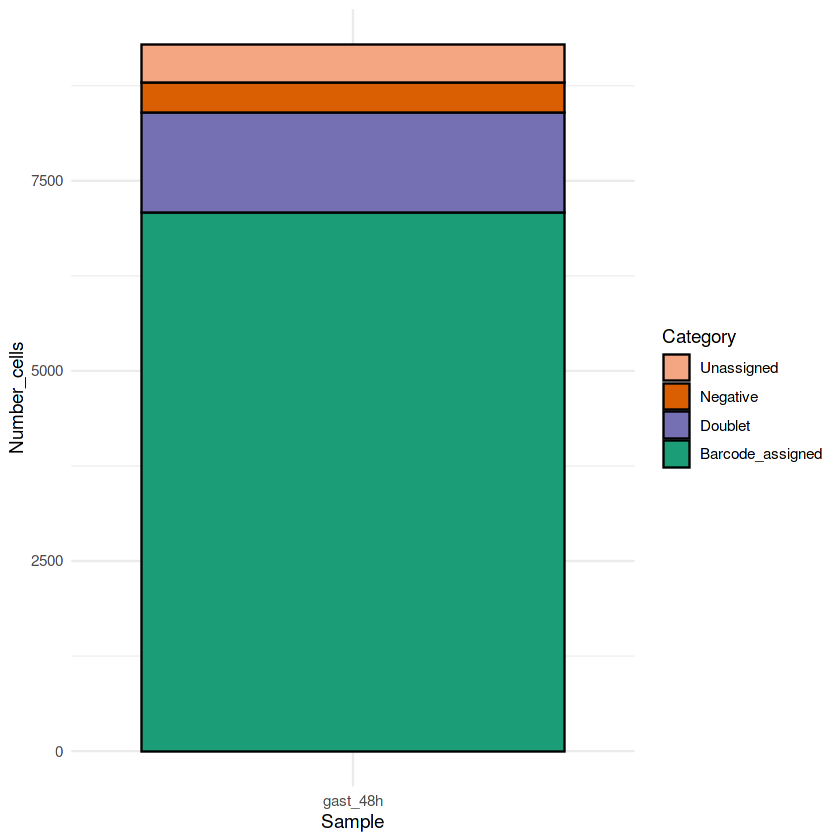

In [24]:
# Stacked
ggplot(x, aes(fill=Category, y=Number_cells, x=Sample)) + 
  geom_bar(position="stack", stat="identity", colour="black") +
  scale_fill_manual(values=c("#f4a582", "#d95f02", "#7570b3", "#1b9e77")) + 
  theme_minimal()

## Saving the files

In [25]:
# Save files
## 
saveRDS(barcode_assignment_48h, file = "./files/demultiplexing/barcode_assignment_48h.rds")
saveRDS(multiseq_assignment_48h, file = "./files/demultiplexing/multiseq_assignment_48h.rds")